In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import textwrap

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
!gdown https://drive.google.com/uc?id=1cRgw7xMs7B-Psyg7IlXpfYUZsMNxQ_el

Downloading...
From: https://drive.google.com/uc?id=1cRgw7xMs7B-Psyg7IlXpfYUZsMNxQ_el
To: /content/dane_projekt1.csv
100% 15.3k/15.3k [00:00<00:00, 41.6MB/s]


# Zadanie 1: Wczytaj dane, obejrzyj je i podsumuj w dwóch-trzech zdaniach.

In [ ]:
data = pd.read_csv('dane_projekt1.csv', sep=';')
data.head()

,id,waga,wzrost,plec,dzieci,wiek,dochod,oszczednosci,jednoos,miejsce,wydatki_zyw
0,52,78.93,176.20,2,5,59,979.01,673.17,0,3,194.96
1,101,78.66,165.73,1,3,52,1043.36,543.89,0,2,259.20
2,146,74.29,171.33,1,2,57,1227.69,773.20,0,1,244.41
3,281,79.11,169.24,1,1,59,2356.74,1914.74,1,2,239.77
4,167,79.23,177.78,2,1,48,1264.95,536.29,1,3,291.05


## Ile jest obserwacji? Przedyskutuj strukturę zbioru danych: ile jest zmiennych ilościowych, a ile jakościowych? Czy występują braki danych? (1pkt)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            310 non-null    int64  
 1   waga          310 non-null    float64
 2   wzrost        310 non-null    float64
 3   plec          310 non-null    int64  
 4   dzieci        310 non-null    int64  
 5   wiek          310 non-null    int64  
 6   dochod        310 non-null    float64
 7   oszczednosci  310 non-null    float64
 8   jednoos       310 non-null    int64  
 9   miejsce       310 non-null    int64  
 10  wydatki_zyw   310 non-null    float64
dtypes: float64(5), int64(6)
memory usage: 26.8 KB


In [ ]:
ilosc = ['waga', 'wzrost', 'dzieci', 'wiek', 'dochod', 'oszczednosci', 'wydatki_zyw']
jakosc = ['plec', 'jednoos', 'miejsce']

Zbiór danych posiada 310 obserwacji. Sposród 11 zmiennych:

- 7 są zmiennymi ilościowymi:  waga, wzrost, liczba dzieci, wiek, dochód, oszczędności, wydatki na zywność

- 3 są zmiennymi jakościowymi : płeć, status gospodarstwa domowego, wielkość miejscowość

- 1 zmienna id jest identyfikatorem, nie posiada dodatkowych informacji

Analizując strukturę zbioru danych, nie zauważyłem żadnych braków danych.

## Przedstaw i skomentuj zasadne tabele częstości lub statystykę opisową dla zmiennych w zbiorze danych (zwróć uwagę na typ zmiennych). (1pkt)

In [ ]:
data[ilosc].describe()

,waga,wzrost,dzieci,wiek,dochod,oszczednosci,wydatki_zyw
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,79.814742,172.726774,2.003226,56.241935,1519.658000,945.994839,12.383097
std,3.292902,6.906733,1.352209,6.746653,1293.464325,787.601212,3232.382607
min,68.890000,155.670000,0.000000,37.000000,645.270000,-204.240000,-55640.190000
25%,77.430000,167.090000,1.000000,52.000000,966.807500,392.545000,199.757500
50%,79.890000,172.815000,2.000000,56.000000,1190.840000,741.190000,249.265000
75%,82.112500,178.032500,3.000000,61.000000,1620.460000,1270.222500,283.267500
max,86.730000,190.790000,5.000000,77.000000,17412.240000,5485.220000,301.690000


In [ ]:
data['plec'].value_counts()

plec
1    168
2    142
Name: count, dtype: int64

In [ ]:
data['jednoos'].value_counts()

jednoos
0    177
1    133
Name: count, dtype: int64

In [ ]:
data['miejsce'].value_counts()

miejsce
2    141
3     85
1     84
Name: count, dtype: int64

In [ ]:
data['dzieci'].value_counts()

dzieci
1    91
2    76
3    56
0    38
4    35
5    14
Name: count, dtype: int64

Analizując dane, można zauważyć, że:

- Waga zawiera się w wąskim przedziale od 68 do 87, co wskazuje na ograniczony zakres wartości.
- Wzrost prezentuje bardziej zróżnicowany zakres od 155 do 190.
- Liczba dzieci różni się znacząco, od 0 do 5, co sugeruje zróżnicowanie w obserwacjach.
- Wiek skupia się głównie na dorosłych w średnim wieku, od 37 do 77 lat, pomijając młodsze osoby.
- Dochód, oszczędności i wydatki na jedzenie wykazują dużą różnorodność wartości.
- Liczba kobiet przeważa nieznacznie nad liczbą mężczyzn (168 vs 142).
- Większość gospodarstw domowych to jednoosobowe (177 vs 133).
- Większość osób mieszka w miastach o populacji od 10 000 do 100 000 osób.

### Anomalie

In [ ]:
anomalies = data['wydatki_zyw'] < 0
data[anomalies]

,id,waga,wzrost,plec,dzieci,wiek,dochod,oszczednosci,jednoos,miejsce,wydatki_zyw


In [ ]:
data = data[ data['wydatki_zyw'] > -10 000]

In [ ]:
mean_by_gender_household = data.groupby(['plec', 'jednoos'])['wydatki_zyw'].transform('mean')
anomalies = data['wydatki_zyw'] < 0
data.loc[anomalies, 'wydatki_zyw'] = mean_by_gender_household[anomalies]

W zbiorze danych zaobserwowano 6 przypadków, w których wydatki na żywność są wartościami ujemnymi. Spośród nich, 2 przypadki o wartościach mniejszych niż -10 000 zostały usunięte, ponieważ znacząco odstają od reszty próbki, charakteryzując się wysokimi dochodami i niskimi wydatkami na żywność.

Pozostałe 4 przypadki mniej odstają od reszty obserwacji. W celu korygowania tych anomalii, zdecydowałem się zastąpić wartości wydatków na żywność średnimi dla danej grupy płci i wielkości gospodarstwa.







## Przedstaw i skomentuj (tam, gdzie zasadne) rozkłady zmiennych, w szczególności porównując je wizualnie z rozkładem normalnym (np. z wykorzystaniem histogramów, wykresów kwantyl-kwantyl, etc). (2pkt)

In [ ]:
waga = data['waga']
wzrost = data['wzrost']
wiek = data['wiek']
dochod = data['dochod']
oszczednosci = data['oszczednosci']
wydatki_zyw = data['wydatki_zyw']
dzieci = data['dzieci']

fig = make_subplots(rows=3, cols=3, subplot_titles=("Waga", "Wzrost", "Wiek", "Dochod", "Oszczędności", "Wydatki_zyw", "Dzieci"),
                    horizontal_spacing=0.05, vertical_spacing=0.05)
fig.add_trace(go.Histogram(histnorm='probability density', x=waga, nbinsx=35), row=1, col=1)
waga_mean, waga_std = np.mean(waga), np.std(waga)
x = np.linspace(min(waga), max(waga), 100)
y = ss.norm.pdf(x, waga_mean, waga_std)
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Gauss dla wagi'), row=1, col=1)

fig.add_trace(go.Histogram(histnorm='probability density', x=wzrost, nbinsx=35), row=1, col=2)
wzrost_mean, wzrost_std = np.mean(wzrost), np.std(wzrost)
x = np.linspace(min(wzrost), max(wzrost), 100)
y = ss.norm.pdf(x, wzrost_mean, wzrost_std)
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Gauss dla wzrostu'), row=1, col=2)

fig.add_trace(go.Histogram(histnorm='probability density', x=wiek, nbinsx=35), row=1, col=3)
wiek_mean, wiek_std = np.mean(wiek), np.std(wiek)
x = np.linspace(min(wiek), max(wiek), 100)
y = ss.norm.pdf(x, wiek_mean, wiek_std)
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Gauss dla wieku'), row=1, col=3)

fig.add_trace(go.Histogram(histnorm='probability density', x=dochod, nbinsx=35), row=2, col=1)

fig.add_trace(go.Histogram(histnorm='probability density', x=oszczednosci, nbinsx=35), row=2, col=2)

fig.add_trace(go.Histogram(histnorm='probability density', x=wydatki_zyw, nbinsx=35), row=2, col=3)

fig.add_trace(go.Histogram(histnorm='probability density', x=dzieci, nbinsx=35), row=3, col=1)

fig.update_layout(title='Histogramy zmiennych', showlegend=False)
fig.update_layout(width=1300, height=1200)

fig.show()

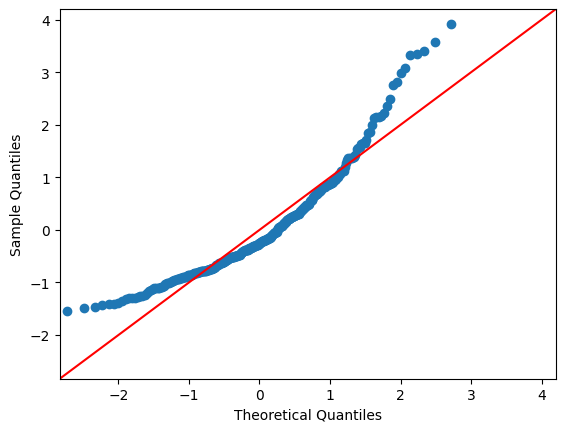

In [ ]:
# @title { run: "auto" }
zmienna = 'oszczednosci' # @param ["waga", "wzrost", "wiek", "dochod", "oszczednosci", "wydatki_zyw", "dzieci"]

sm.qqplot(data[zmienna], line ='45', fit=True)
plt.show()


Rozkład wagi, wzrostu i wieku wydaje się być symetryczny i skoncentrowany wokół wartości średniej, brak wyraźnych odstępstw od rozkładu normalnego. Wykresy qq potwierdzają tę symetrię.

Rozkład dochodu, oszczędności i wydatków na żywność nie przypomina rozkładu normalnego. Występuje brak symetrii, a na wykresach qq można zaobsersować znaczące odchylenia od linii prostej.

# Zadanie 2:
Sprawdź, czy występują pomiędzy zmiennymi zależności. Policz i zaprezentuj na wykresie typu
mapa ciepła (heatmap) zasadny współczynnik korelacji pomiędzy zmiennymi ilościowymi, a także zbadaj
zależność zmiennych jakościowych. Skomentuj wyniki ze szczególnym uwzględnieniem kwestii istotności
statystycznej. (3pkt)

## Gotowa funkcja: https://tosinharold.medium.com/enhancing-correlation-matrix-heatmap-plots-with-p-values-in-python-41bac6a7fd77

In [ ]:
def corr_heatmap_with_pval(df, method = 'pearson', figsize=(20, 10), title=None):
  """
  df: dataframe to be used. Ensured the dataframe has been sliced to contain only the column you need. It accepts only numerical columns
  method: default uses the pearson method. It overall permits 3 methods; 'pearson', 'spearman' and 'kendall'
  figsize: default is (20, 10) but you can change it based on your preference
  title: Specify the title for your chart, default is None
  """
  # Make a copy of the df
  data = df.copy()
  # Check features correlation
  corr = data.corr(method = method)

  # Create a mask to hide the upper triangle
  mask = np.zeros_like(corr, dtype=bool)
  mask[np.triu_indices_from(mask)] = True

  # Set the diagonal elements of the mask to False to display self-correlation
  np.fill_diagonal(mask, False)

  fig, ax = plt.subplots(figsize=figsize)
  plt.title(title, fontsize=14)

  # Create the heatmap with the custom mask
  heatmap = sns.heatmap(corr,
                        annot=True,
                        annot_kws={"fontsize": 10},  # Adjust annotation font size
                        fmt='.2f',
                        linewidths=0.5,
                        cmap='RdBu',
                        mask=mask,
                        ax=ax)

  # Create a function to calculate and format p-values
  p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
  for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
      x = data.iloc[:, i]
      y = data.iloc[:, j]
      mask = ~np.logical_or(np.isnan(x), np.isnan(y))
      if np.sum(mask) > 0:
        if method == 'pearson':
          p_values[i, j] = ss.pearsonr(x[mask], y[mask])[1] #Changes based on the method chosen in the function
        elif method == 'kendall':
          p_values[i, j] = ss.kendalltau(x[mask], y[mask])[1]
        elif method == 'spearman':
          p_values[i, j] = ss.spearmanr(x[mask], y[mask])[1]

  p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

  # Create a mask for the p-values heatmap
  mask_pvalues = np.triu(np.ones_like(p_values), k=1)

  # Calculate the highest and lowest correlation coefficients
  max_corr = np.max(corr.max())
  min_corr = np.min(corr.min())

  # Annotate the heatmap with p-values and change text color based on correlation value
  for i in range(p_values.shape[0]):
    for j in range(p_values.shape[1]):
      if mask_pvalues[i, j]:
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
          correlation_value = corr.iloc[i, j]
          text_color = 'white' if correlation_value >= (max_corr - 0.4) or correlation_value <= (min_corr + 0.4) else 'black'
          if p_value <= 0.01:
            #include double asterisks for p-value <= 0.01
            ax.text(i + 0.5, j + 0.8, f'(p = {p_value:.2f})**',
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize=8,
                    color=text_color)
          elif p_value <= 0.05:
            #include single asterisks for p-value <= 0.05
            ax.text(i + 0.5, j + 0.8, f'(p = {p_value:.2f})*',
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize=8,
                    color=text_color)
          else:
            ax.text(i + 0.5, j + 0.8, f'(p = {p_value:.2f})',
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize=8,
                    color=text_color)

  # Customize x-axis labels
  x_labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
  ax.set_xticklabels(x_labels, rotation=0, ha="center")

  # Customize y-axis labels
  y_labels = [textwrap.fill(label.get_text(), 15) for label in ax.get_yticklabels()]
  ax.set_yticklabels(y_labels, rotation=0, ha="right")
  ax.grid(False)
  plt.show()

## Wizualizacja

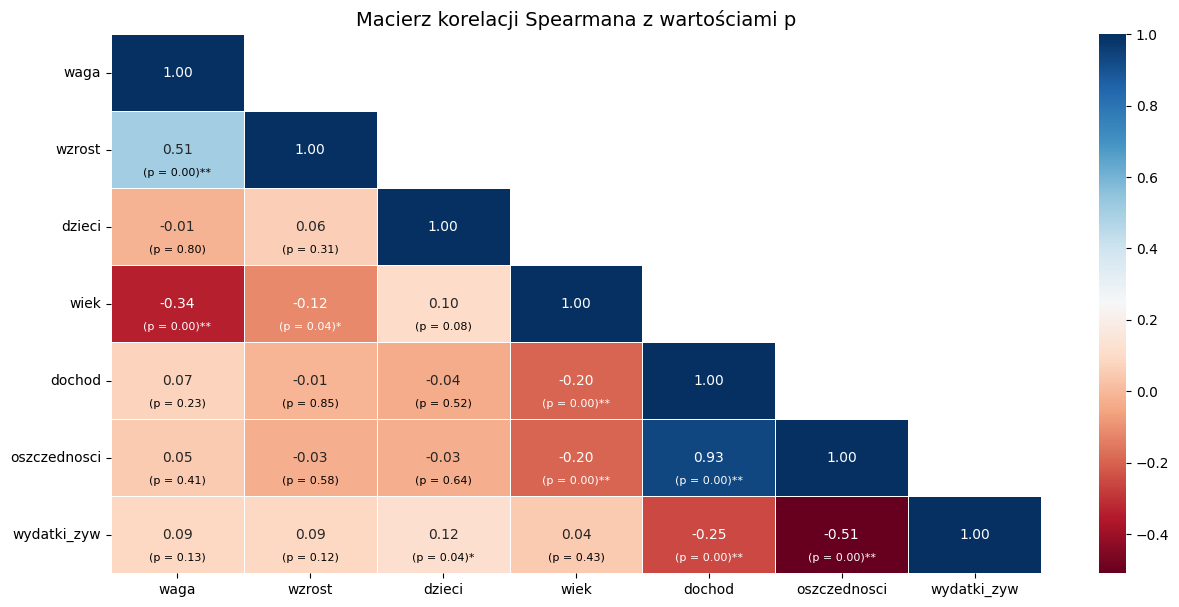

In [ ]:
corr_heatmap_with_pval(data[ilosc], method = 'spearman', figsize=(15,7), title="Macierz korelacji Spearmana z wartościami p")

Przyjmując poziom istotności $\alpha = 0.01$, statystycznie istotne korelacje to:

- dodatnia korelacja $\rho_S = 0.51$ między wagą a wzrostem

- ujemna korelacja $\rho_S = - 0.34$ między wagą a wiekiem

- ujemna korelacja $\rho_S = -0.2$ między wiekiem a dochodem

- ujemna korelacja $\rho_S = -0.2$ między wiekiem a oszczędnościami

- bardzo duża dodatnia korelacja $\rho_S = 0.93$ między dochodem a oszczędnościami

- ujemna korelacja $\rho_S = - 0.25$ między dochodem a wydatkami na żywność

- ujemna korelacja $\rho_S = - 0.51$ między oszczędnościami a wydatkami na żywność



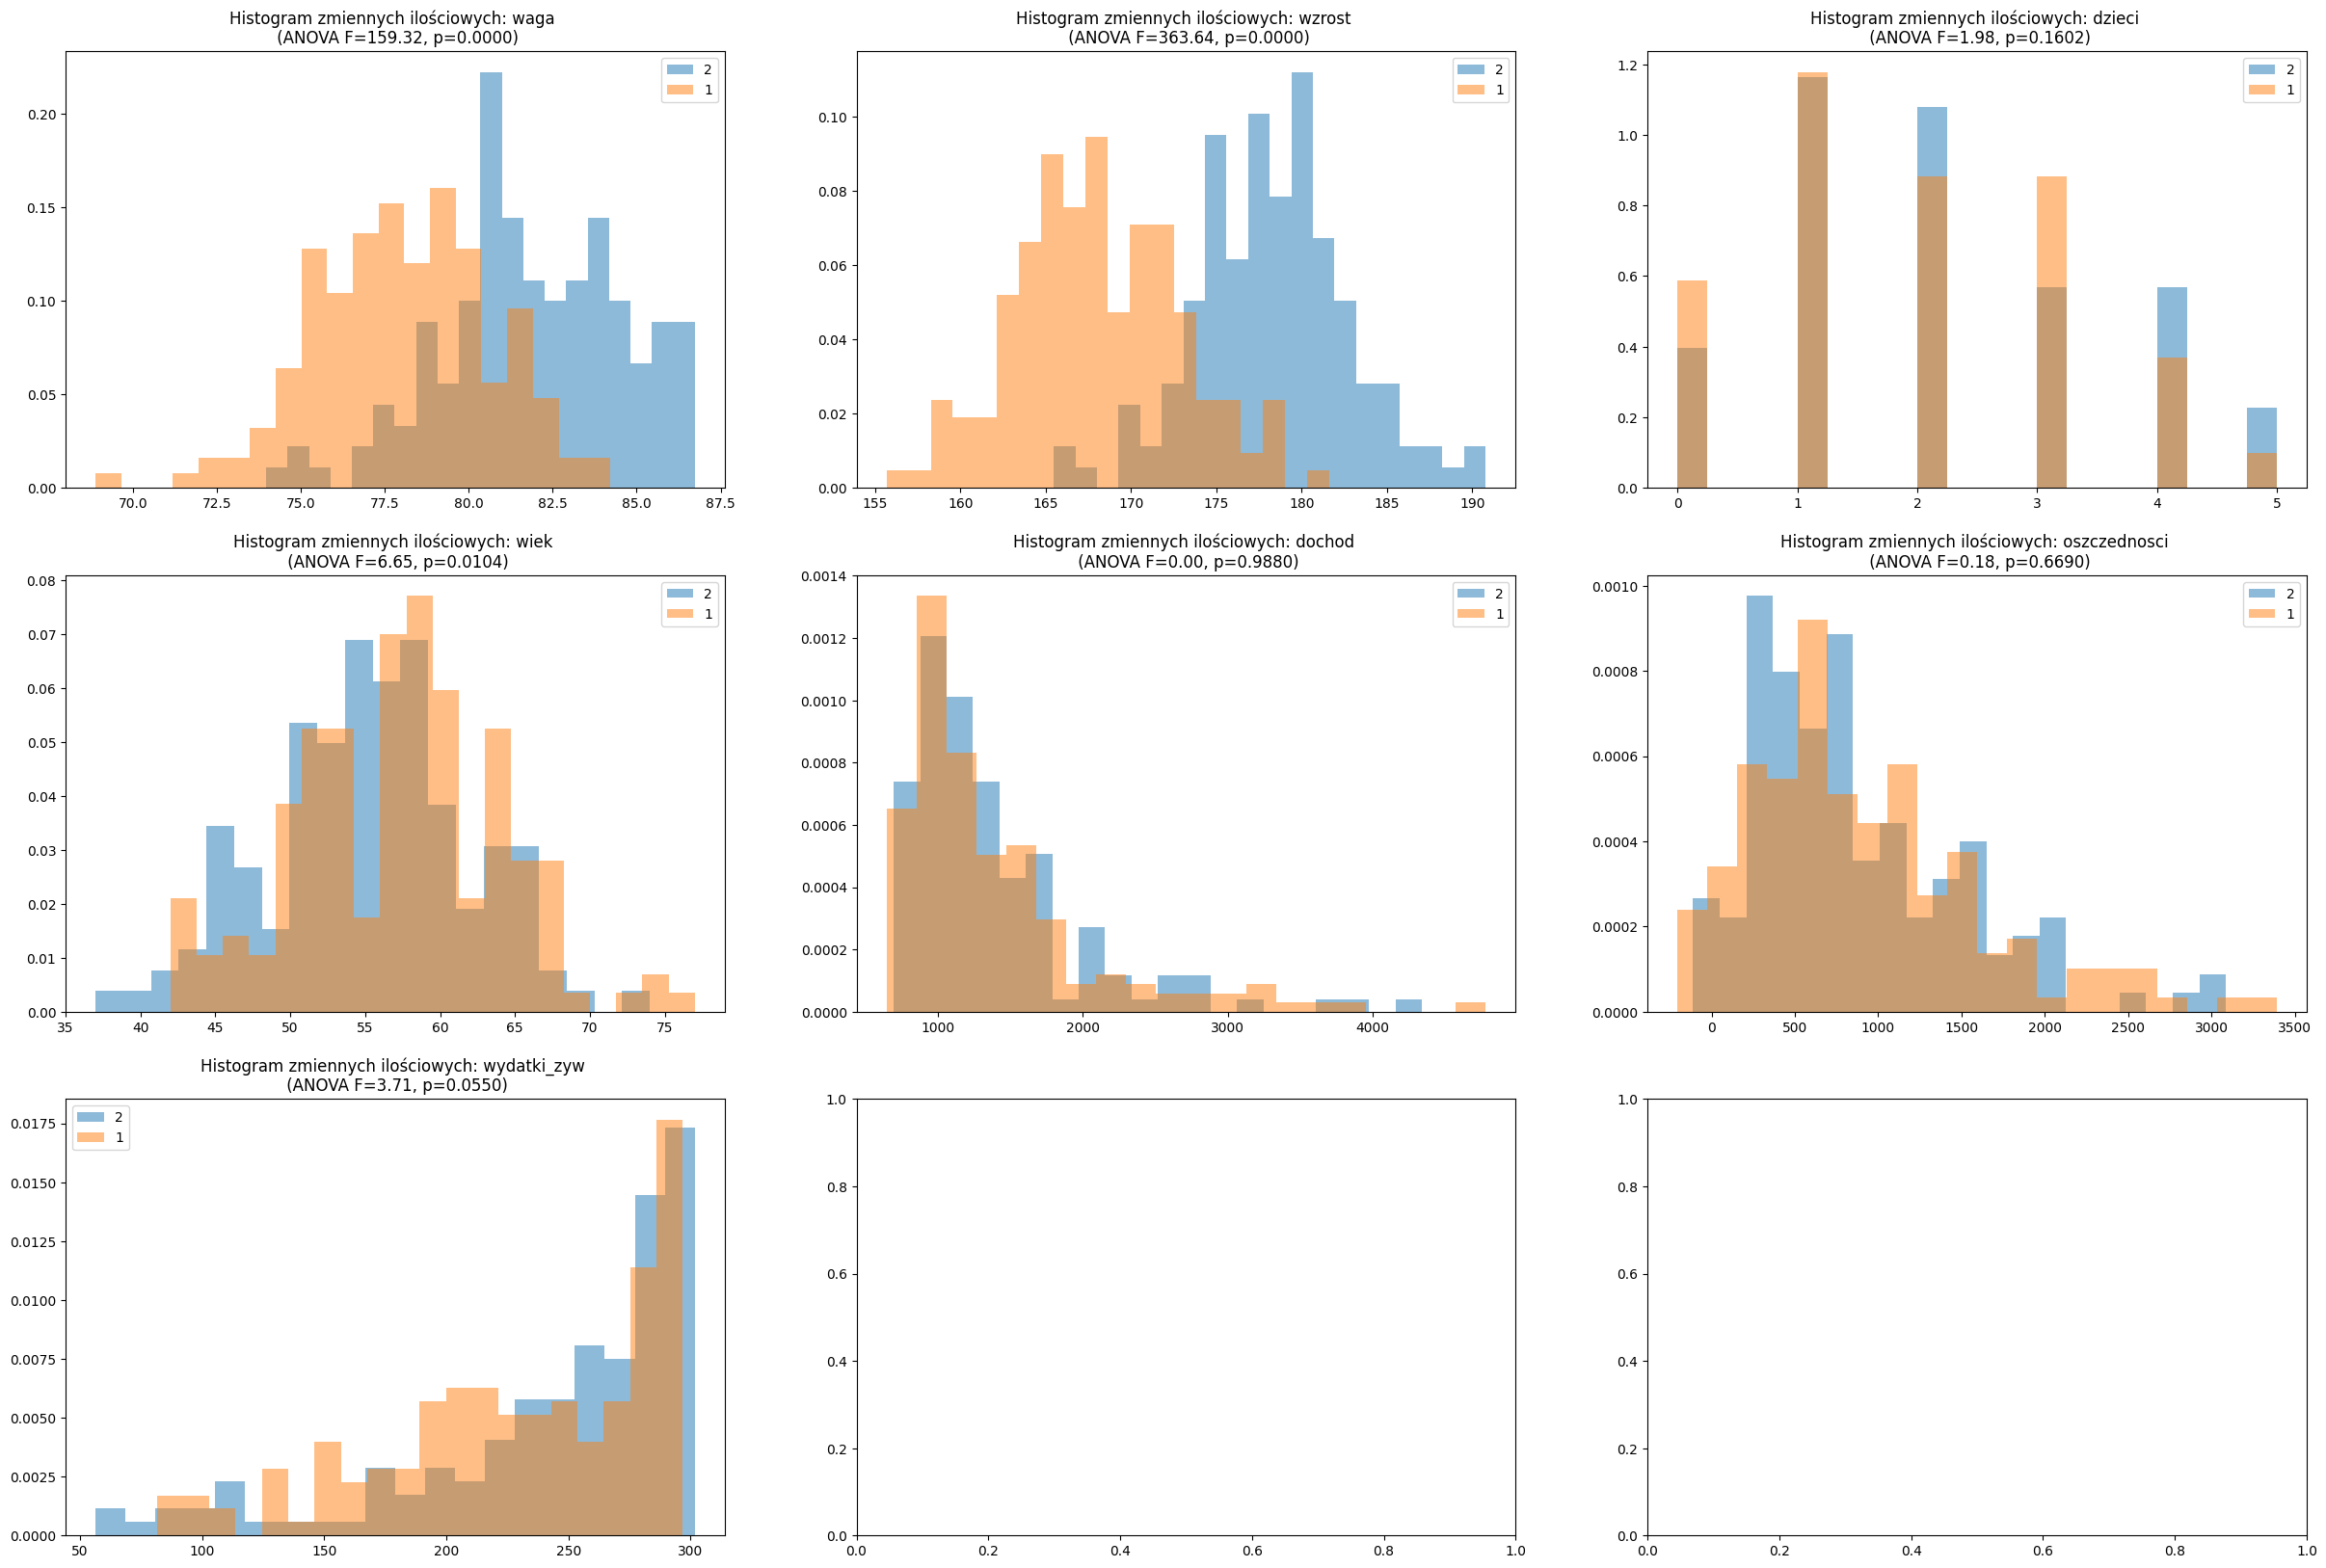

In [ ]:
# @title { run: "auto" }
categorical = 'plec' # @param ["plec", "jednoos", "miejsce"]

fig, axes = plt.subplots(3, 3, figsize=(30, 20))

for i, zmienna in enumerate(ilosc):
    ax = axes[i//3 , i % 3]

    groups = []
    for group in data[categorical].unique():
        groups.append(data[data[categorical] == group][zmienna])
        ax.hist(data[data[categorical] == group][zmienna],
                bins=20,
                density=True,
                alpha=0.5,
                label=f'{group}')

    f_statistic, p_value = ss.f_oneway(*groups)
    ax.set_title(f'Histogram zmiennych ilościowych: {zmienna} \n (ANOVA F={f_statistic:.2f}, p={p_value:.4f})')
    ax.legend()


Aby zbadać zależność zmiennych ilościowych od zmiennych jakościowych, przedstawiono histogramy, oznaczając wybrane grupy. Dodatkowo, zasotosowano test ANOVA dla dwóch grup. Statystycznie istotne wyniki zaobserwowano dla zależności:

- płci i wagi
- płci i wzrostu
- jednoos i dochodu
- jednoos i oszczędności

Na histogramach tych zmiennych można zaobserwować wykresy, które można "rozdzielic".

In [ ]:
for x in jakosc:
  for y in jakosc:
    if x != y:
      cross_tab = pd.crosstab(data[x], data[y])
      print(cross_tab)
      chi2, p, dof, expected = ss.chi2_contingency(cross_tab)
      print("Wartość statystyki chi2:", chi2)
      print("Wartość p:", p)
      print()

jednoos   0   1
plec           
1        97  69
2        80  62
Wartość statystyki chi2: 0.06514297016478762
Wartość p: 0.7985445276179397

miejsce   1   2   3
plec               
1        50  69  47
2        33  72  37
Wartość statystyki chi2: 2.88361268274806
Wartość p: 0.23650017256846523

plec      1   2
jednoos        
0        97  80
1        69  62
Wartość statystyki chi2: 0.06514297016478764
Wartość p: 0.7985445276179397

miejsce   1   2   3
jednoos            
0        51  78  48
1        32  63  36
Wartość statystyki chi2: 0.8073055636380679
Wartość p: 0.6678759796966499

plec      1   2
miejsce        
1        50  33
2        69  72
3        47  37
Wartość statystyki chi2: 2.8836126827480606
Wartość p: 0.23650017256846517

jednoos   0   1
miejsce        
1        51  32
2        78  63
3        48  36
Wartość statystyki chi2: 0.807305563638068
Wartość p: 0.6678759796966498



Dla danych zmiennych jakościowych nie występuje żadna istotnie statystyczna zależność zmiennych. Wszystkie wartości p są większe od zdanej istotności statystycznej $\alpha = 0.01$.

# Zadanie 3:
Podsumuj dane przynajmniej trzema różnymi wykresami (skomentuj każdy z wykresów). Podstawowy zestaw wykresów zawiera:

• Wykresy rozrzutu (scatter-plot) dla wszystkich zmiennych ilościowych względem zmiennej wydatki_zyw.

• Wykresy typu pudełkowy (boxplot) dla jednej wybranej zmiennej ilościowej w podziale na miejsce
zamieszkania respondentów.

• Wykres słupkowy skumulowany (stacked bar chart) dla płci respondenta i faktu, czy prowadzi jednoosobowe gospodarstwo domowe.


(3pkt, każdy wykres z podstawowego zestawu wart 1pkt: 0,25 pkt za sam wykres, 0,75pkt za komentarz
w kontekście analizy eksploracyjnej. Mile widziane dodatkowe wykresy wg własnej inwencji uzupełniające
analizę eksploracyjną, np. słupkowe, liniowe, kołowe... – możliwe dodanie do 1 dodatkowego punktu przez
osobę sprawdzającą za interesujące dodatkowe wizualizacje)

## Wykresy rozrzutu (scatter-plot) dla wszystkich zmiennych ilościowych względem zmiennej wydatki_zyw.

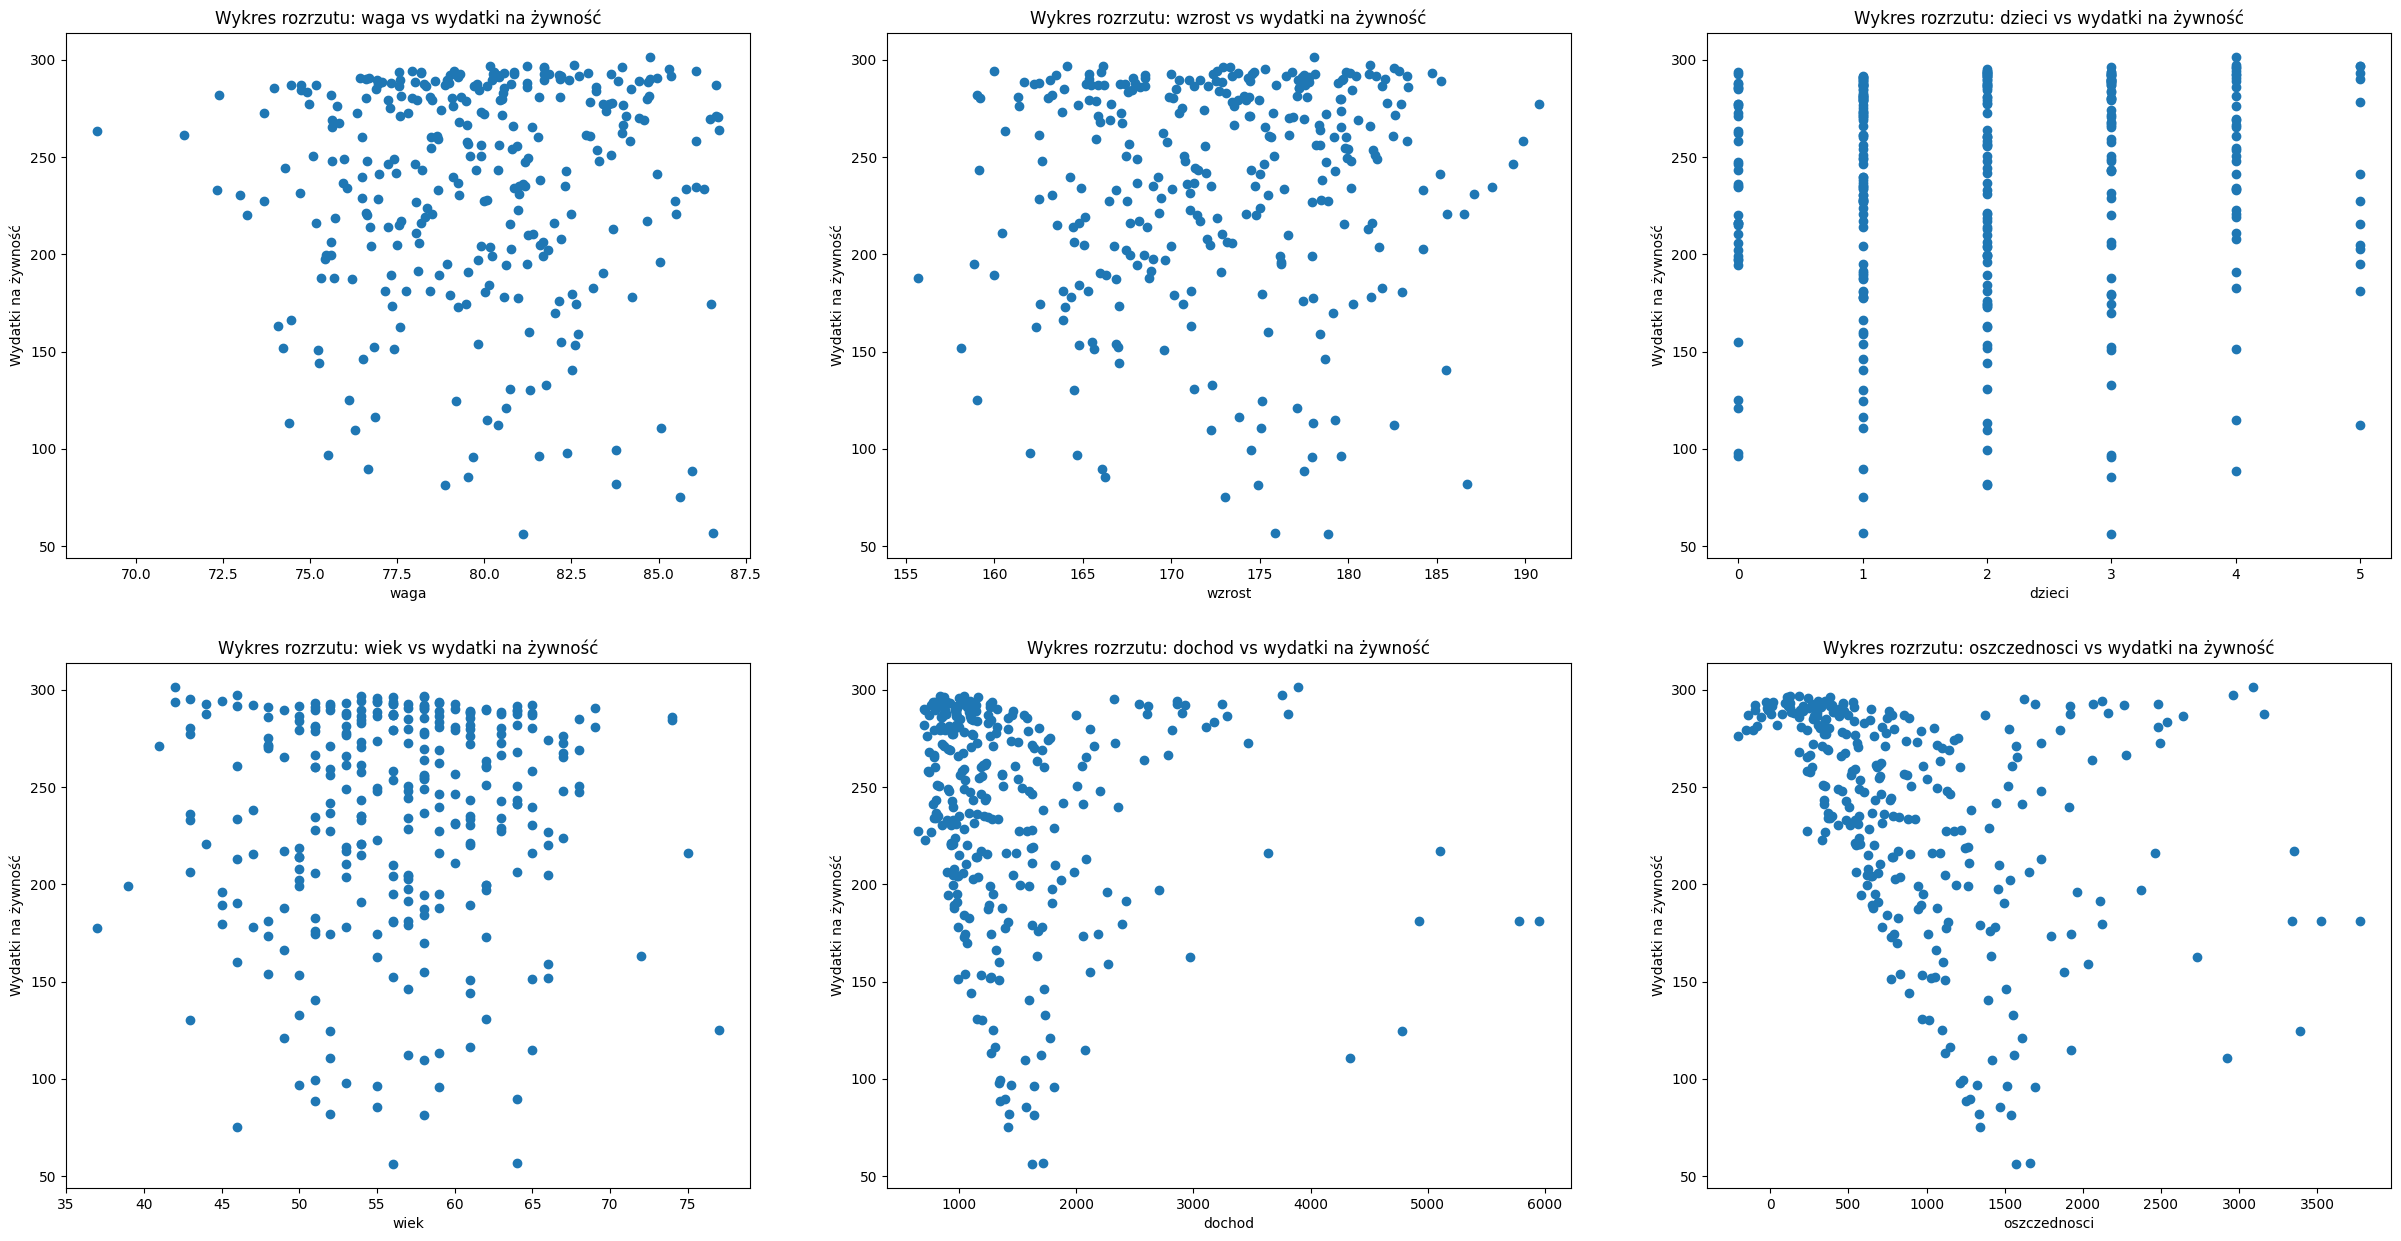

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(30, 15))

for i, zmienna in enumerate(ilosc[:-1]): # bez wydatki_zyw
    ax = axes[i//3 , i % 3]
    ax.scatter(x=data[zmienna], y=data['wydatki_zyw'])
    ax.set_xlabel(zmienna)
    ax.set_ylabel('Wydatki na żywność')
    ax.set_title(f'Wykres rozrzutu: {zmienna} vs wydatki na żywność')

Osoby, które praktycznie nie posiadają oszczędności są grupą najwięcej wydającą na jedzenie.

## Wykresy typu pudełkowy (boxplot) dla jednej wybranej zmiennej ilościowej w podziale na miejsce zamieszkania respondentów.

In [ ]:
px.box(data,
       x="miejsce",
       y="dochod",
       title="")

## Wykres słupkowy skumulowany (stacked bar chart) dla płci respondenta i faktu, czy prowadzi jednoosobowe gospodarstwo domowe.

In [ ]:
data['jednoos'] = data['jednoos'].astype('category')

grouped_data = data.groupby(['plec', 'jednoos']).size().reset_index(name='liczba_respondentow')

stacked_bar_chart = px.bar(grouped_data, x='plec', y='liczba_respondentow', color='jednoos',
                            title='Wykres słupkowy skumulowany: Płeć vs Jednoosobowe gospodarstwo domowe',
                            barmode='stack',
                            color_discrete_sequence=['blue', 'green'])
stacked_bar_chart.show()

## Wykres dodatkowy -

In [ ]:
import altair as alt

data_alt = data.reset_index()
alt.Chart(data_alt).mark_circle().encode(
   alt.X(alt.repeat("row"), type='quantitative'),
   alt.Y(alt.repeat("column"), type='quantitative'),
   color='jednoos',# color by job type
).properties(
   width=150,
   height=150
).repeat(
   row=['dochod', 'oszczednosci', 'wydatki_zyw'], # income, education, prestige,
   column=['dochod', 'oszczednosci', 'wydatki_zyw']# income, education, prestige,
).interactive()

alt.RepeatChart(...)

# Zadanie 4:
Policz dwustronne przedziały ufności na poziomie ufności 1 − α = 0.99 dla zmiennej wiek dla
następujących parametrów rozkładu:

• średnia i odchylenie standardowe;

• kwartyle 1, 2 i 3.

Podaj wykorzystane założenia i skomentuj, czy wydają Ci się one uprawnione (2pkt: 0,25pkt za średnią,
0,25pkt za wariancję, 0,75pkt za kwartyle, 0,75pkt za podanie i komentarz do przyjętych założeń)

In [ ]:
alfa = 0.01
wiek_std = data['wiek'].std()
wiek_mean = data['wiek'].mean()
N = len(data['wiek'])


t = ss.t.ppf(1 - alfa/2, df = N - 1)
x = t * wiek_std / np.sqrt(N)

ci_srednia = [wiek_mean - x, wiek_mean + x]


low_quantile = ss.chi2.ppf(alfa/2, N - 1)
up_quantile = ss.chi2.ppf(1 - alfa/2, N - 1)

ci_odchylenie = (np.sqrt((N - 1) * wiek_std**2 / up_quantile),
                     np.sqrt((N - 1) * wiek_std**2 / low_quantile))


kwartyl_1 = ss.scoreatpercentile(data['wiek'], 25)
kwartyl_2 = ss.scoreatpercentile(data['wiek'], 50)
kwartyl_3 = ss.scoreatpercentile(data['wiek'], 75)

ci_kwartyl_1 = (kwartyl_1 - x, kwartyl_1 + x)
ci_kwartyl_2 = (kwartyl_2 - x, kwartyl_2 + x)
ci_kwartyl_3 = (kwartyl_3 - x, kwartyl_3 + x)

print("Przedział ufności dla średniej wieku:", ci_srednia)
print("Przedział ufności dla odchylenia standardowego:", ci_odchylenie)
print("Przedział ufności dla kwartyli 1:", ci_kwartyl_1)
print("Przedział ufności dla kwartyli 2:", ci_kwartyl_2)
print("Przedział ufności dla kwartyli 3:", ci_kwartyl_3)

Przedział ufności dla średniej wieku: [55.22605928478664, 57.22199266326531]
Przedział ufności dla odchylenia standardowego: (6.1173837271084475, 7.534382234714389)
Przedział ufności dla kwartyli 1: (50.752033310760666, 52.747966689239334)
Przedział ufności dla kwartyli 2: (55.002033310760666, 56.997966689239334)
Przedział ufności dla kwartyli 3: (60.002033310760666, 61.997966689239334)


Korzystam tutaj z założenia o normalności rozkładu. Poprzednio, oglądając wykresy histogramów i qq, nie widziałem przeciwskazań, aby uznać, że dane nie pochodzą z rokładu normalnego. Aby mieć większą pewność, zastosuje test Shapiro-Wilka:

In [ ]:
stat, p_value = ss.shapiro(data['wiek'])
print(p_value)

0.435180127620697


p_value > 0.01, a więc nie ma powodów, żeby odrzucić hipoteze zerową - dane mogą pochodzić z rokładu normalnego.

# Zadanie 5:
Socjologowie bajtoccy dzielą społeczeństwo Bajtocji według czterech klas zamożności:

• klasa niższa (osiągany dochód poniżej 25 centylu rozkładu dochodów)

• klasa średnia (osiągany dochód równy lub wyższy 25 centylowi i niższy niż 75 centyl rozkładu dochodów)

• klasa wyższa średnia (osiągany dochód równy lub wyższy 75 centylowi i niższy niż 90 centyl rozkładu
dochodów)

• klasa wyższa (osiągany dochód równy lub wyższy 90 centylowi rozkładu dochodów)

Przedyskutuj i porównaj zróżnicowanie wydatków na żywność w wyżej wymienionych klasach zamożności
(2pkt: 0,5pkt za przeprowadzenie podziału, 1pkt za obliczenie właściwej miary zróżnicowania, 0,5pkt. za
komentarz i dyskusję wyników).

In [ ]:
def klasy_zamoznosci(x):
  """
  0 - klasa niższa
  1 - klasa średnia
  2 - klasa wyższa średnia
  3 - klasa wyższa
  """
  cent25 = ss.scoreatpercentile(data['dochod'], 25)
  cent75 = ss.scoreatpercentile(data['dochod'], 75)
  cent90 = ss.scoreatpercentile(data['dochod'], 90)

  if x < cent25:
    return 0
  elif x < cent75:
    return 1
  elif x < cent90:
    return 2
  else:
    return 3

data['klasa_zam'] = data['dochod'].apply(klasy_zamoznosci)

In [ ]:
category_order = [0, 1, 2, 3]

fig = px.histogram(data,
             x="wydatki_zyw",
             facet_col="klasa_zam",
             facet_col_wrap=4,
             labels={"wydatki_zyw": "Wydatki na żywność"},
             title="Wydatki na żywność a klasy zamożności",
             category_orders={"klasa_zam": category_order})

for annotation in fig.layout.annotations:
    txt = int(annotation.text.split("=")[-1])
    if txt == 0:
      annotation.text = 'klasa niższa'
    elif txt == 1:
      annotation.text = 'klasa średnia'
    elif txt == 2:
      annotation.text = 'klasa wyższa średnia'
    else:
      annotation.text = 'klasa wyższa'
fig.show()

zbadaj zróżnicowanie wewnątrz tej zmiennej:
-

# Zadanie 6:
Odpowiedz na następujące pytania badawcze, przeprowadzając najlepiej nadające się do tego
testy statystyczne na poziomie istotności α = 0, 01:

• Czy kobiety cechują się wyższymi wartościami oszczędności niż mężczyzni?

• Czy niższa proporcja wydatków na żywność względem dochodu jest skorelowana z wyższymi oszczędnościami?

• Czy średnia waga kobiet w próbie jest wyższa niż 56 kg?

oraz:

• zweryfikuj dodatkową (sensowną) hipotezę o zgodności z konkretnym rozkładem parametrycznym dla
wybranej zmiennej (np. "zmienna A ma rozkład Poissona z parametrem 1").

Podaj wykorzystywane założenia i skomentuj czy wydają Ci się one uprawnione. Każdy test statystyczny po
1 punkcie (w sumie 4pkt). Punktowane jest sformułowanie hipotezy zerowej oraz alternatywnej (0,25pkt),
uzasadnienie/zasadność wybranego testu (0,25pkt), przeprowadzenie testu (0,25pkt) i podanie konkluzji
testu (0,25pkt).

## Czy kobiety cechują się wyższymi wartościami oszczędności niż mężczyźni?

In [ ]:
stat, p_value = ss.shapiro(data['oszczednosci'])
print(p_value)

5.570557036482793e-13


- nie możemy założyć, że oszczędności pochodzą z rokładu normalnego
- należy więc zastosować test nieparametryczny, w tym przypadku Mann-Whitney U-test.

In [ ]:
women_savings = data[data['plec'] == 1]['oszczednosci']
men_savings = data[data['plec'] == 2]['oszczednosci']

print(ss.mannwhitneyu(women_savings, men_savings, alternative='greater'))

MannwhitneyuResult(statistic=12134.0, pvalue=0.32778633910133403)


Wartość p wynoszące 0.38 sugeruje, że nie ma istotnie statystycznej różnicy w oszczędnościach (na poziomie $\alpha$ = 0.01), i nie możemy odrzucić naszej hipotezy zerowej (że średnie tych grup są równe)

## Czy niższa proporcja wydatków na żywność względem dochodu jest skorelowana z wyższymi oszczędnościami?

In [ ]:
data['wyd_zyw/dochod'] = data['wydatki_zyw'] / data['dochod']

fig = px.scatter(data, x='wyd_zyw/dochod', y='oszczednosci', title='proporcja wydatków na żywność względem dochodu a oszczędności')
fig.show()

In [ ]:
corr, p_value = ss.spearmanr(data['wyd_zyw/dochod'], data['oszczednosci'])
print("Współczynnik korelacji Spearmana:", corr)
print("Wartość p dla testu Spearmana:", p_value)

Współczynnik korelacji Spearmana: -0.9735840516966984
Wartość p dla testu Spearmana: 2.454222942161991e-198


Wartość p jest mniejsza niż wybrany poziom istotności, więc pozwala odrzucić hipotezę zerową i uznać, że istnieje istotna statystycznie korelacja między proporcją wydatków na żywność a oszczędnościami. Wartość współczynnika korelacji -0.88 wskazuje na silną negatywną zależność między tymi zmiennymi, więc to prawda, ze niższa proporcja wydatków na żywność względem dochodu jest skorelowana z wyższymi oszczędnościami.

## Czy średnia waga kobiet w próbie jest wyższa niż 56 kg?

In [ ]:
stat, p_value = ss.shapiro(data['waga'])
print(p_value)

0.14326490461826324


Jeżeli chodzi o wagę, nie widzę przeciwskazań do twierdzenia, że dane te nie pochodzą z rokładu normalnego.

W tym przypadku mogę założyć hipotezy:

h0: średnia waga kobiet jest mniejsza lub równa 56kg

h1: średnia waga kobiet jest wyższa niż 56kg



In [ ]:
alfa = 0.01
women_weight = data[data['plec'] == 1]['waga']
women_weight_mean = women_weight.mean()
women_weight_std = women_weight.std()
t_stat, p_value = ss.ttest_1samp(women_weight, 56)

print("Średnia waga kobiet w próbie:", women_weight_mean)
print("Wartość t-statystyki:", t_stat)
print("Wartość p dla jednostronnego t-testu:", p_value)

if p_value < alfa and women_weight_mean > 56:
    print("Średnia waga kobiet w próbie jest istotnie wyższa niż 56 kg.")
else:
    print("Nie ma wystarczających dowodów, aby stwierdzić, że średnia waga kobiet w próbie jest istotnie wyższa niż 56 kg.")

Średnia waga kobiet w próbie: 78.01246987951806
Wartość t-statystyki: 108.93642200224386
Wartość p dla jednostronnego t-testu: 1.2871476977375852e-155
Średnia waga kobiet w próbie jest istotnie wyższa niż 56 kg.


## Zweryfikuj dodatkową (sensowną) hipotezę o zgodności z konkretnym rozkładem parametrycznym dla wybranej zmiennej
(np. "zmienna A ma rozkład Poissona z parametrem 1").

In [ ]:
fig = px.histogram(data, x='dochod', nbins =40)
fig.show()

In [ ]:
income_data = data['dochod']
params = ss.lognorm.fit(income_data)
statistic, p_value = ss.kstest(income_data, 'lognorm', args=params)

print("Test dopasowania dla rozkładu log-normalnego:")
print(f"  Parametry: s={params[0]}, loc={params[1]}, scale={params[2]}")
print(f"  Statystyka testowa D: {statistic}")
print(f"  Wartość p: {p_value}")

Test dopasowania dla rozkładu log-normalnego:
  Parametry: s=0.7980790974896975, loc=607.9428886646865, scale=600.6512235794348
  Statystyka testowa D: 0.03278250021052309
  Wartość p: 0.8841467678424637


# Zadanie 7
 Przeprowadź badanie wysokości wydatków na żywność z wykorzystaniem zmiennych z bazy.
Przyjmij poziom istotności α = 0.01. W tym celu:

• Oszacuj wstępny model zawierający wszystkie zmienne z oryginalnej bazy (poza id) oraz stałą, gdzie
zmienna wydatki_zyw jest zmienną objaśnianą. Pamiętaj o rozkodowaniu zmiennych jakościowych.
(0,5pkt)

• Skomentuj R2
, testy łącznej i indywidualnej istotności we wstępnym modelu. (1pkt)

• Sprawdź, czy wstępny model spełnia założenia Klasycznego Modelu Regresji Liniowej (KMRL). Zwróć
szczególną uwagę na kwestie liniowości formy funkcyjnej, homoskedastyczności i braku autokorelacji
składnika losowego oraz rozkładu składnika losowego. (2pkt)

• Sprawdź, czy we wstępnym modelu występuje problem niedokładnej współliniowości (multicollinearity )
(0,5pkt)

• Korzystając z analizy obserwacji odstających dla wstępnego modelu, sprawdź, czy baza zawiera błędy.
Jeśli znajdziesz podejrzane obserwacje, zdecyduj i uzasadnij, co z nimi zrobisz. (1pkt)

• Popraw model tak, aby spełniał jak najwięcej założeń KMRL. Opisz kroki podjęte do otrzymania
“najlepszego” modelu (4pkt).
Wskazówka: Rozważ różne formy funkcyjne oraz transformacje zmiennych.

• Przedstaw ilościową interpretację wybranych dwóch indywidualnie istotnych współczynników w “najlepszym” modelu. Pamiętaj, że stałej nie interpretuje się. Zalecany wybór zmiennych niepoddanych
transformacji. (1pkt)

• Jakie są opisowe charakterystyki osób, które cechują wydatki na żywność należące do górnych 10%
predykcji wydatków na żywność w Państwa “najlepszym” modelu? Sprawdź i przedyskutuj (2pkt).

### Oszacuj wstępny model zawierający wszystkie zmienne z oryginalnej bazy (poza id) oraz stałą, gdzie zmienna wydatki_zyw jest zmienną objaśnianą. Pamiętaj o rozkodowaniu zmiennych jakościowych.

In [ ]:
model1 = ols("wydatki_zyw ~ waga + wzrost + C(plec) + dzieci + wiek + dochod + oszczednosci + C(jednoos) + C(miejsce)", data=data).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     61.90
Date:                Mon, 06 May 2024   Prob (F-statistic):           2.51e-66
Time:                        17:20:34   Log-Likelihood:                -1488.6
No. Observations:                 304   AIC:                             2999.
Df Residuals:                     293   BIC:                             3040.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         226.2224     90.953     

### Skomentuj R2, testy łącznej i indywidualnej istotności we wstępnym modelu. (1pkt)


R2: Wartość R-squared wynosi 0.542, oznacza to, że około 54.2% zmienności wydatków na żywność jest wyjaśnione przez zmiennie zawarte w modelu. Jest to umiarkowany wynik, co sugeruje, że model dopasowuje się do danych, jednak wymaga poprawek.

F-statistics: Wartość F satystyki wynosi 35.17, i jest istotna statystycznie (p < 0.01). Oznacza to, że istnieje zmienna niezależna, która ma istotny wpływ na zmienną zależną.

T-tests: Analiza wartości t wykazuje, że w modelu istotnymi zmiennymi są:
- dochod, oszczednosci i jednoos

Podczas, gdy zmienne, które nie mają istotności statystycznej to:
- waga, wzrost

### Sprawdź, czy wstępny model spełnia założenia Klasycznego Modelu Regresji Liniowej (KMRL). Zwróć szczególną uwagę na kwestie liniowości formy funkcyjnej, homoskedastyczności i braku autokorelacji składnika losowego oraz rozkładu składnika losowego.

In [ ]:
fig = px.scatter(x = model1.fittedvalues, y = model1.resid, labels={'x': 'Fitted Values', 'y': 'Residuals'},
                 title='Residuals vs Fitted Values')
fig.show()

Z wykresu reszt vs. przewidywane wartości widać wzorzec, nieliniową, paraboliczną zależność, która wskazuje na brak liniowości w modelu, co narusza założenie o liniowości formy funkcyjnej.

Dodatkowo, nierównomierne ułożenie reszt wskazuje na naruszenie homoskedastyczności. Wariancja reszt zmienia się wraz ze zmianą przewidywanych wartości.

In [ ]:
# Reszty
residuals = model1.resid

# Test Kolmogorova-Smirnova
kolmogorov_smirnov_statistic, kolmogorov_smirnov_p_value = ss.kstest(residuals, 'norm')

# Test Shapiro-Wilka
shapiro_wilk_statistic, shapiro_wilk_p_value = ss.shapiro(residuals)

print("Statystyka testu Kolmogorova-Smirnova:", kolmogorov_smirnov_statistic)
print("P-value dla testu Kolmogorova-Smirnova:", kolmogorov_smirnov_p_value)

print("Statystyka testu Shapiro-Wilka:", shapiro_wilk_statistic)
print("P-value dla testu Shapiro-Wilka:", shapiro_wilk_p_value)

Statystyka testu Kolmogorova-Smirnova: 0.5636683475687585
P-value dla testu Kolmogorova-Smirnova: 7.4595061071158855e-93
Statystyka testu Shapiro-Wilka: 0.9152145981788635
P-value dla testu Shapiro-Wilka: 3.5310970727259194e-12


Wynik Jarque-Bera to p_jb=3.41e-49. Dla testów Kolmogorova-Smirnova i Shapiro-Wilka otrzymujemy równie małe wartości p.

Wyniki te wskazują na to, że reszty nie pochodzą z rozkładu normalnego.

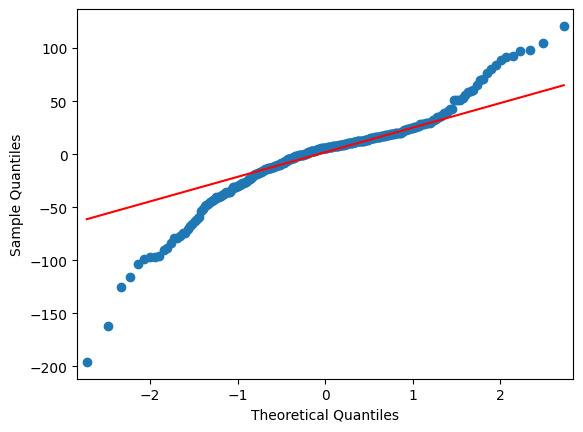

In [ ]:
fig = sm.qqplot(model1.resid, line='q')
fig.show()

Z wykresu kwantyl-kwantyl można zaobserwować znaczne odbieganie od liniowej zależności na brzegach wykresu. Odbieganie te jest istotne, i również wskazuje na to, że reszty nie pochodzą z rozkładu normalnego.

In [ ]:
res_data = pd.DataFrame({'Observation Number': range(1, len(residuals) + 1), 'Residuals': residuals})

# Tworzenie wykresu linii za pomocą Plotly Express
line_plot = px.line(res_data, x='Observation Number', y='Residuals', title='Line Plot of Residuals vs. Number of Observations')
line_plot.update_xaxes(title='Number of Observations')
line_plot.update_yaxes(title='Residuals')
line_plot.add_hline(y=0, line_dash='dash', line_color='red')
line_plot.show()

Na tym wykresie można zaobserwować różne szczyty wartości. Oscylują one na różnych poziomach. Nieregularne wahania wskazują na brak heteroskedastyczności w danych. Sugeruje to również możliwośc występowania autokorelacji.

Podsumowując, model ten nie spełnia założeń Klasycznego Modelu Regresji Liniowej

****

Autokorelacja - istnieje test na autokorelacje (chyba w raporcie stats models)

Homo - mozna z wykresu jak powyzyej , ale sa rowniez dedykowane testy



### Sprawdź, czy we wstępnym modelu występuje problem niedokładnej współliniowości (multicollinearity )


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

formula = "wydatki_zyw ~ waga + wzrost + C(plec) + dzieci + wiek + dochod + oszczednosci + C(jednoos) + C(miejsce)"
y, X = dmatrices(formula, data, return_type='dataframe')

# Obliczenie VIF dla każdej zmiennej objaśniającej
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

            feature          VIF
0         Intercept  2324.653505
1      C(plec)[T.2]     2.621790
2   C(jednoos)[T.1]     2.379872
3   C(miejsce)[T.2]     1.516709
4   C(miejsce)[T.3]     1.513880
5              waga     1.738392
6            wzrost     2.232505
7            dzieci     1.028044
8              wiek     1.204996
9            dochod     8.950618
10     oszczednosci    11.788331


Wartość VIF dla zmiennej dochod jest stosunkowo wysoka (8.95), a dla zmiennej oszczednosci jeszcze wyższa (11.79), co sugeruje, że wystepuje tu problem niedokładnej współliniowości.

### Korzystając z analizy obserwacji odstających dla wstępnego modelu, sprawdź, czy baza zawiera błędy.
Jeśli znajdziesz podejrzane obserwacje, zdecyduj i uzasadnij, co z nimi zrobisz. (1pkt)

We wstępie zidentyfikowano już anomalie w zmiennej wydatki_zyw i odpowiednio je zmodyfikowano. Żeby sprawdzić, czy jeszcze jakieś obserwacje powinny zostać usunięte, zastosowano następującą analize modelu:

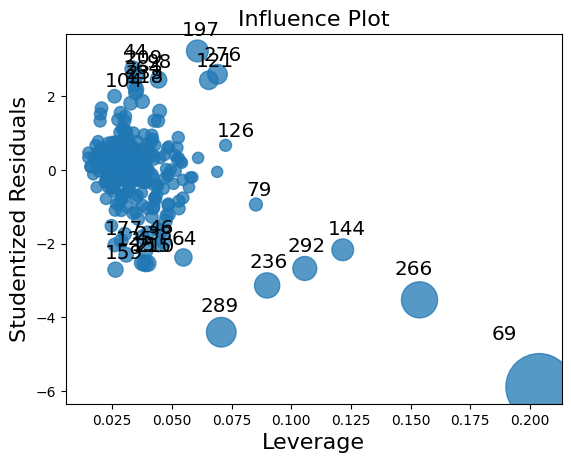

In [ ]:
sm.graphics.influence_plot(model1, criterion="cooks").show()

Obserwacje z numerem 69, 266, 144, 292, 289, 236 wyróżniają się spośród pozostałych danych ze względu na znaczące wartości leverage oraz reszty. Dodatkowo, 4 te wartości (69, 266, 144, 292), to wartości które próbowałem naprawić, ponieważ posiadały ujemne wydatki na żywność. Dochodzę do wniosku, że lepiej te wartości usunąć, gdyż psują nasz model.

In [ ]:
index_to_remove = [69, 144, 266, 292, 289, 236]
data = data.drop(index_to_remove)


Obserwacja o identyfikatorze 69 wyróżnia się spośród pozostałych danych ze względu na znaczące wartości leverage oraz reszty.

 Jednak po dokładnej analizie wartości zmiennych dla tej obserwacji stwierdzono, że nie ma wystarczających podstaw do jej usunięcia, a sama obserwacja może być obserwowalna w rzeczywistości.

### Popraw model tak, aby spełniał jak najwięcej założeń KMRL.
Opisz kroki podjęte do otrzymania “najlepszego” modelu (4pkt).
Wskazówka: Rozważ różne formy funkcyjne oraz transformacje zmiennych.

### Usuwanie podejrzanych obserwacji w celu poprawienia modelu.

In [ ]:
model2 = ols("wydatki_zyw ~ waga + wzrost + C(plec) + dzieci + wiek + dochod + oszczednosci + C(jednoos) + C(miejsce)", data=data).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     133.8
Date:                Mon, 06 May 2024   Prob (F-statistic):          1.35e-102
Time:                        16:47:17   Log-Likelihood:                -1386.8
No. Observations:                 302   AIC:                             2796.
Df Residuals:                     291   BIC:                             2837.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         138.0236     67.382     

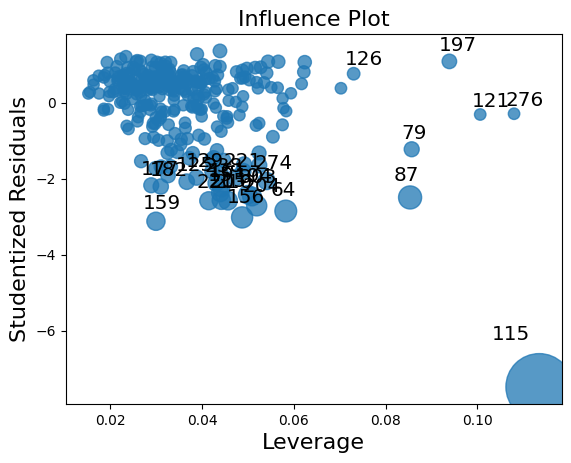

In [ ]:
sm.graphics.influence_plot(model2, criterion="cooks").show()

In [ ]:
index_to_remove = [115]
data = data.drop(index_to_remove)

In [ ]:
model3 = ols("wydatki_zyw ~ waga + wzrost + C(plec) + dzieci + wiek + dochod + oszczednosci + C(jednoos) + C(miejsce)", data=data).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.6
Date:                Mon, 06 May 2024   Prob (F-statistic):          2.98e-113
Time:                        16:50:27   Log-Likelihood:                -1356.2
No. Observations:                 301   AIC:                             2734.
Df Residuals:                     290   BIC:                             2775.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         112.0206     61.897     

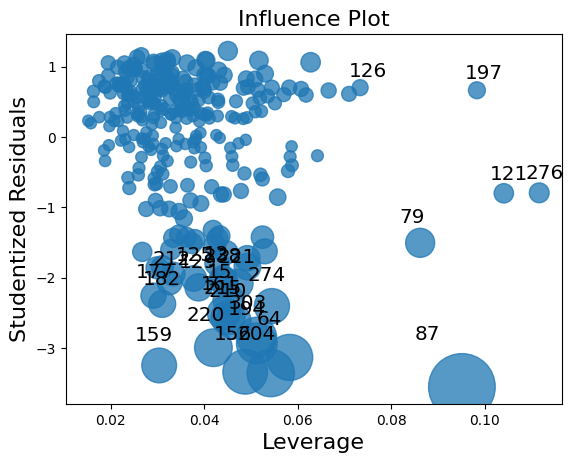

In [ ]:
sm.graphics.influence_plot(model3, criterion="cooks").show()

In [ ]:
index_to_remove = [87]
data = data.drop(index_to_remove)

In [ ]:
model4 = ols("wydatki_zyw ~ waga + wzrost + C(plec) + dzieci + wiek + dochod + oszczednosci + C(jednoos) + C(miejsce)", data=data).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     172.1
Date:                Mon, 06 May 2024   Prob (F-statistic):          1.97e-115
Time:                        16:52:55   Log-Likelihood:                -1345.8
No. Observations:                 300   AIC:                             2714.
Df Residuals:                     289   BIC:                             2754.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         106.8510     60.709     

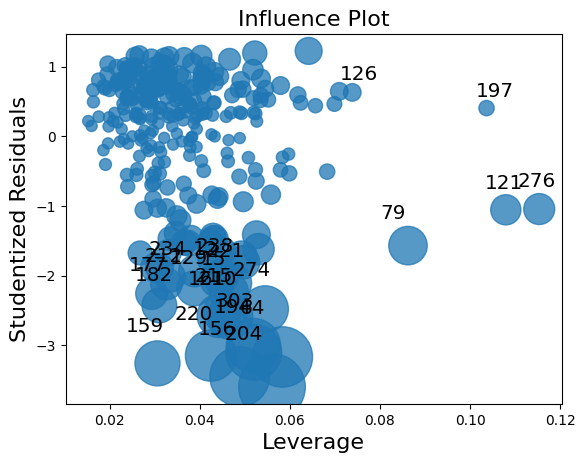

In [ ]:
sm.graphics.influence_plot(model4, criterion="cooks").show()

Po usunięciu kilku obserwacji, wykres influence wygląda już znacząco lepiej. Model się znacznie poprawił, wartość R2 wynosi już 0.856, co jest istotnie lepszym wynikiem.

### Usuwanie nieistotnych zmiennych

Usuwam płeć i wagę, miejsce, wzrost i wiek

In [ ]:
model2 = ols("wydatki_zyw ~ waga + wzrost + C(plec) + dzieci + wiek + dochod + oszczednosci + C(jednoos) + C(miejsce)", data=data).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     61.90
Date:                Mon, 06 May 2024   Prob (F-statistic):           2.51e-66
Time:                        17:56:29   Log-Likelihood:                -1488.6
No. Observations:                 304   AIC:                             2999.
Df Residuals:                     293   BIC:                             3040.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         226.2224     90.953     

### Zależność zmiennych

In [ ]:
model2 = ols("wydatki_zyw ~ waga + wzrost + C(plec) + dzieci + wiek + dochod * oszczednosci + C(jednoos) + C(miejsce)", data=data).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     77.92
Date:                Mon, 06 May 2024   Prob (F-statistic):           1.67e-76
Time:                        17:53:26   Log-Likelihood:                -1464.0
No. Observations:                 304   AIC:                             2950.
Df Residuals:                     293   BIC:                             2991.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              64.8421    

In [ ]:
fig = px.scatter(x = model2.fittedvalues, y = model2.resid, labels={'x': 'Fitted Values', 'y': 'Residuals'},
                 title='Residuals vs Fitted Values')
fig.show()

### Transformacja zmiennych

In [ ]:
for zmienne in ['waga', 'wzrost', 'wiek', 'dochod', 'oszczednosci']:
  transformed_wydatki_zyw, lambda_value = ss.boxcox(data[data[zmienne]>0][zmienne])

  # Wyświetlenie wartości lambdy
  print("Wartość lambda:", zmienne, lambda_value)

Wartość lambda: waga 1.4331140427894784
Wartość lambda: wzrost 0.5241359350723144
Wartość lambda: wiek 1.0080823251303626
Wartość lambda: dochod -0.9726273806183399
Wartość lambda: oszczednosci 0.37116097505419926


In [ ]:
model2 = ols("wydatki_zyw ~ dzieci + dochod * oszczednosci + wiek*oszczednosci + C(jednoos) ", data=data).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     118.4
Date:                Mon, 06 May 2024   Prob (F-statistic):           6.27e-82
Time:                        20:08:26   Log-Likelihood:                -1458.3
No. Observations:                 304   AIC:                             2933.
Df Residuals:                     296   BIC:                             2962.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -11.8561    

## Przedstaw ilościową interpretację wybranych dwóch indywidualnie istotnych współczynników w “najlepszym” modelu.
Pamiętaj, że stałej nie interpretuje się. Zalecany wybór zmiennych niepoddanych transformacji. (1pkt)

### Jakie są opisowe charakterystyki osób, które cechują wydatki na żywność należące do górnych 10% predykcji wydatków na żywność w Państwa “najlepszym” modelu? Sprawdź i przedyskutuj (2pkt).

In [ ]:
data['oszczednosci*dochod'] = data['oszczednosci'] * data['dochod']

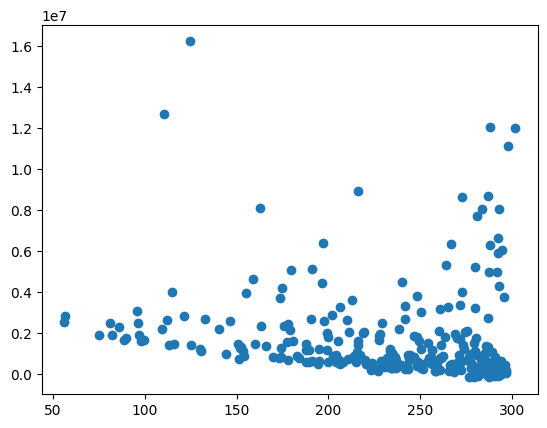

In [ ]:
plt.scatter(data['wydatki_zyw'], data['oszczednosci*dochod'])